# Analyse Stock Price Data of a selected Timeframe

## Install TA-Lib

In [1]:
# conda install -c conda-forge ta-lib

In [2]:
# !pip install yfinance
# !pip install TA-Lib
# !pip install fredapi
# !pip install yahooquery
# !pip install yahoo_fin

In [3]:
import numpy as np
import pandas as pd
import yfinance as yf
import yahooquery as yq
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import talib
from fredapi import Fred
import warnings
warnings.filterwarnings('ignore')

In [4]:
start_date = dt.datetime(2013, 3, 1).date()
end_date = dt.datetime(2023, 3, 1).date()
ticker = 'PG'
data = yf.download(ticker, start_date, end_date)
data.index = data.index.date
data

[*********************100%***********************]  1 of 1 completed


Open        High         Low       Close   Adj Close  \
2013-03-01   75.699997   76.720001   75.559998   76.489998   57.155205   
2013-03-04   76.250000   76.680000   75.970001   76.680000   57.297176   
2013-03-05   76.779999   77.389999   76.720001   77.050003   57.573669   
2013-03-06   77.010002   77.449997   76.809998   77.199997   57.685738   
2013-03-07   77.220001   77.489998   76.779999   76.900002   57.461571   
...                ...         ...         ...         ...         ...   
2023-02-22  139.979996  141.580002  139.880005  140.500000  140.500000   
2023-02-23  140.229996  141.139999  139.100006  140.050003  140.050003   
2023-02-24  138.929993  139.429993  138.080002  139.259995  139.259995   
2023-02-27  139.610001  140.470001  138.529999  139.139999  139.139999   
2023-02-28  138.449997  138.589996  137.279999  137.559998  137.559998   

             Volume  
2013-03-01  9599700  
2013-03-04  7631000  
2013-03-05  9716200  
2013-03-06  7194700  
2013-03-07  7111400  
...             ...  
2023-02-22  6126300  
2023-02-23  5835400  
2023-02-24  5260700  
2023-02-27  5820900  
2023-02-28  6709900  

[2517 rows x 6 columns]

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2517 entries, 2013-03-01 to 2023-02-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2517 non-null   float64
 1   High       2517 non-null   float64
 2   Low        2517 non-null   float64
 3   Close      2517 non-null   float64
 4   Adj Close  2517 non-null   float64
 5   Volume     2517 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 137.6+ KB


In [6]:
data.describe().applymap("{0:.5f}".format).T

count           mean            std            min  \
Open       2517.00000      103.15718       26.61698       68.02000   
High       2517.00000      103.92105       26.91807       68.30000   
Low        2517.00000      102.43683       26.34545       65.02000   
Close      2517.00000      103.19209       26.62958       68.06000   
Adj Close  2517.00000       91.91833       31.20683       54.92213   
Volume     2517.00000  8451508.74056  5381520.11853  2022100.00000   

                     25%            50%            75%              max  
Open            81.30000       89.72000      127.49000        164.39999  
High            81.78000       90.21000      128.92000        165.35001  
Low             80.82000       89.18000      126.60000        163.39999  
Close           81.33000       89.66000      127.34000        164.21001  
Adj Close       65.56175       76.27832      122.01482        160.20659  
Volume     6097100.00000  7361300.00000  9326400.00000  123735700.00000

#### Add simple moving average of 30 days and exponential moving average of smoothing constant at $\alpha$ = 0.3

In [7]:
data['30MA'] = data['Close'].rolling(window=30).mean()
data['50MA'] = data['Close'].rolling(window=50).mean()
data['200MA'] = data['Close'].rolling(window=200).mean()
data['EMA_0.3'] = data['Close'].ewm(alpha=0.3, adjust=False).mean()
data.tail()

Open        High         Low       Close   Adj Close  \
2023-02-22  139.979996  141.580002  139.880005  140.500000  140.500000   
2023-02-23  140.229996  141.139999  139.100006  140.050003  140.050003   
2023-02-24  138.929993  139.429993  138.080002  139.259995  139.259995   
2023-02-27  139.610001  140.470001  138.529999  139.139999  139.139999   
2023-02-28  138.449997  138.589996  137.279999  137.559998  137.559998   

             Volume        30MA        50MA      200MA     EMA_0.3  
2023-02-22  6126300  142.477335  146.240201  142.31955  139.659252  
2023-02-23  5835400  142.082668  146.022801  142.23980  139.776477  
2023-02-24  5260700  141.702668  145.758600  142.15805  139.621532  
2023-02-27  5820900  141.347001  145.496600  142.07980  139.477073  
2023-02-28  6709900  140.903001  145.191000  142.00455  138.901950

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# data = pd.read_csv("TSLA.csv", parse_dates=True)

# Create subplots and mention plot grid size
fig = make_subplots(rows=2, cols=1, shared_xaxes=True, 
               vertical_spacing=0.03, row_width=[1.7, 1.7])

# Plot OHLC on 1st row
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], high=data["High"],
                low=data["Low"], close=data["Close"], name="OHLC"), row=1, col=1)

# Plot volume on 2nd row
fig.add_trace(go.Bar(x=data.index, y=data['Volume'], name="volume"), row=2, col=1)

fig.add_trace(go.Scatter(x=data.index,
                y=data["30MA"],
                name="30MA",
                opacity=0.7,
                line=dict(color='orange', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["50MA"],
                name="50MA",
                opacity=0.7,
                line=dict(color='green', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["200MA"],
                name="200MA",
                opacity=0.7,
                line=dict(color='red', width=2),
                ))

fig.add_trace(go.Scatter(x=data.index,
                y=data["EMA_0.3"],
                name="EMA_0.3",
                opacity=0.7,
                line=dict(color='blue', width=2),
                ))

# Show OHLC's rangeslider plot 
fig.update(layout_xaxis_rangeslider_visible=True)
fig.show()

#### We can see that the daily returns are random and normally distributed as shown by the 2 graphs below.

<AxesSubplot:>

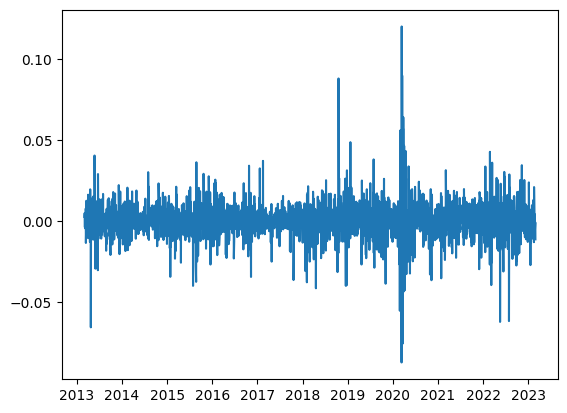

In [9]:
daily_returns = data.Close.pct_change()
daily_returns.plot()

Text(0, 0.5, 'Counts')

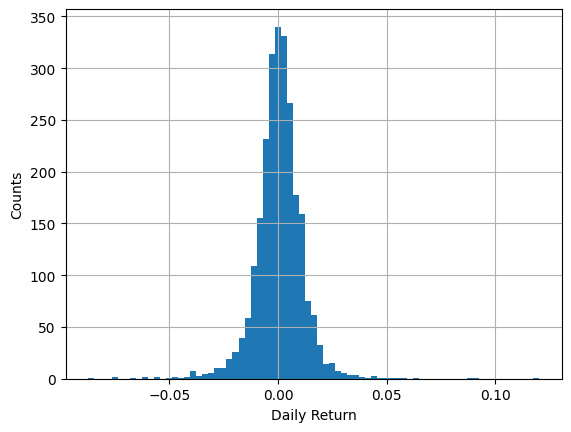

In [10]:

daily_returns.hist(bins=75)
plt.xlabel('Daily Return')
plt.ylabel('Counts')

#### Analysis of Close Price based on Year, Quarter, Month & Week

In [11]:
data.index = pd.to_datetime(data.index)
monthly_mean = data['Close'].resample('M').mean()
monthly_data = monthly_mean.to_frame()
monthly_data.head(10)

Close
2013-03-31  77.004000
2013-04-30  78.949546
2013-05-31  78.904545
2013-06-30  77.506501
2013-07-31  80.096818
2013-08-31  80.163182
2013-09-30  78.374501
2013-10-31  78.680869
2013-11-30  83.552000
2013-12-31  82.541429

In [12]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter
monthly_data.head(10)

Close  Year      Month  dayofweek  quarter
2013-03-31  77.004000  2013      March     Sunday        1
2013-04-30  78.949546  2013      April    Tuesday        2
2013-05-31  78.904545  2013        May     Friday        2
2013-06-30  77.506501  2013       June     Sunday        2
2013-07-31  80.096818  2013       July  Wednesday        3
2013-08-31  80.163182  2013     August   Saturday        3
2013-09-30  78.374501  2013  September     Monday        3
2013-10-31  78.680869  2013    October   Thursday        4
2013-11-30  83.552000  2013   November   Saturday        4
2013-12-31  82.541429  2013   December    Tuesday        4

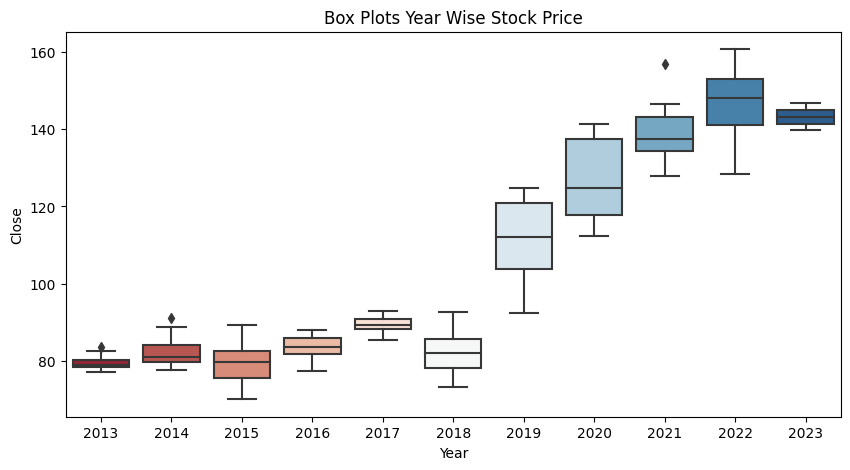

In [13]:
plt.figure(figsize=(10,5))
ax = sns.boxplot(x=monthly_data['Year'],y=monthly_data['Close'],palette='RdBu')
ax.set_title('Box Plots Year Wise Stock Price')
plt.style.context('fivethirtyeight')

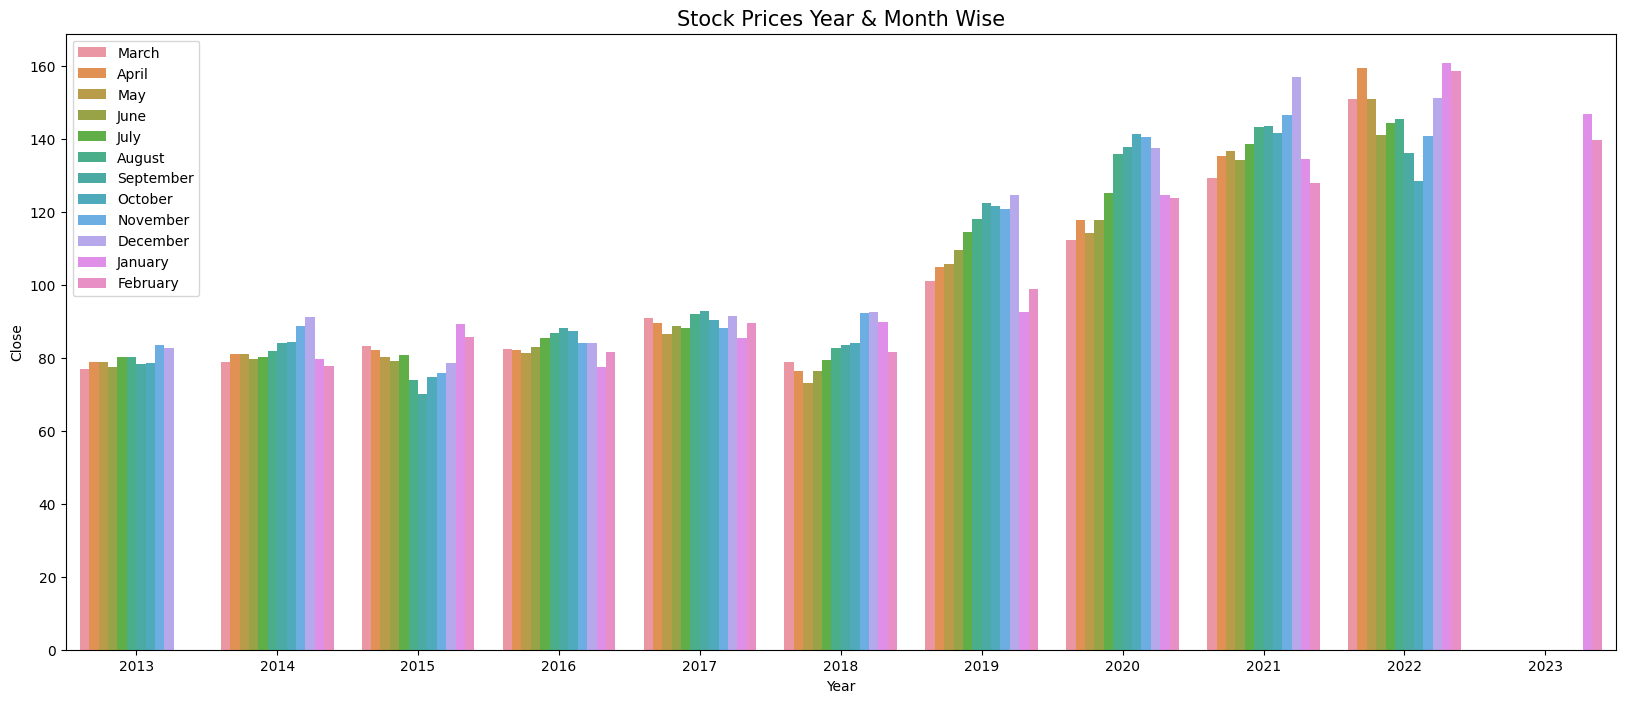

In [14]:
fig, ax = plt.subplots(figsize=(20,8))
palette = sns.color_palette("mako_r", 4)
a = sns.barplot(x="Year", y="Close",hue = 'Month',data=monthly_data)
a.set_title("Stock Prices Year & Month Wise",fontsize=15)
plt.legend(loc='upper left')
plt.show()

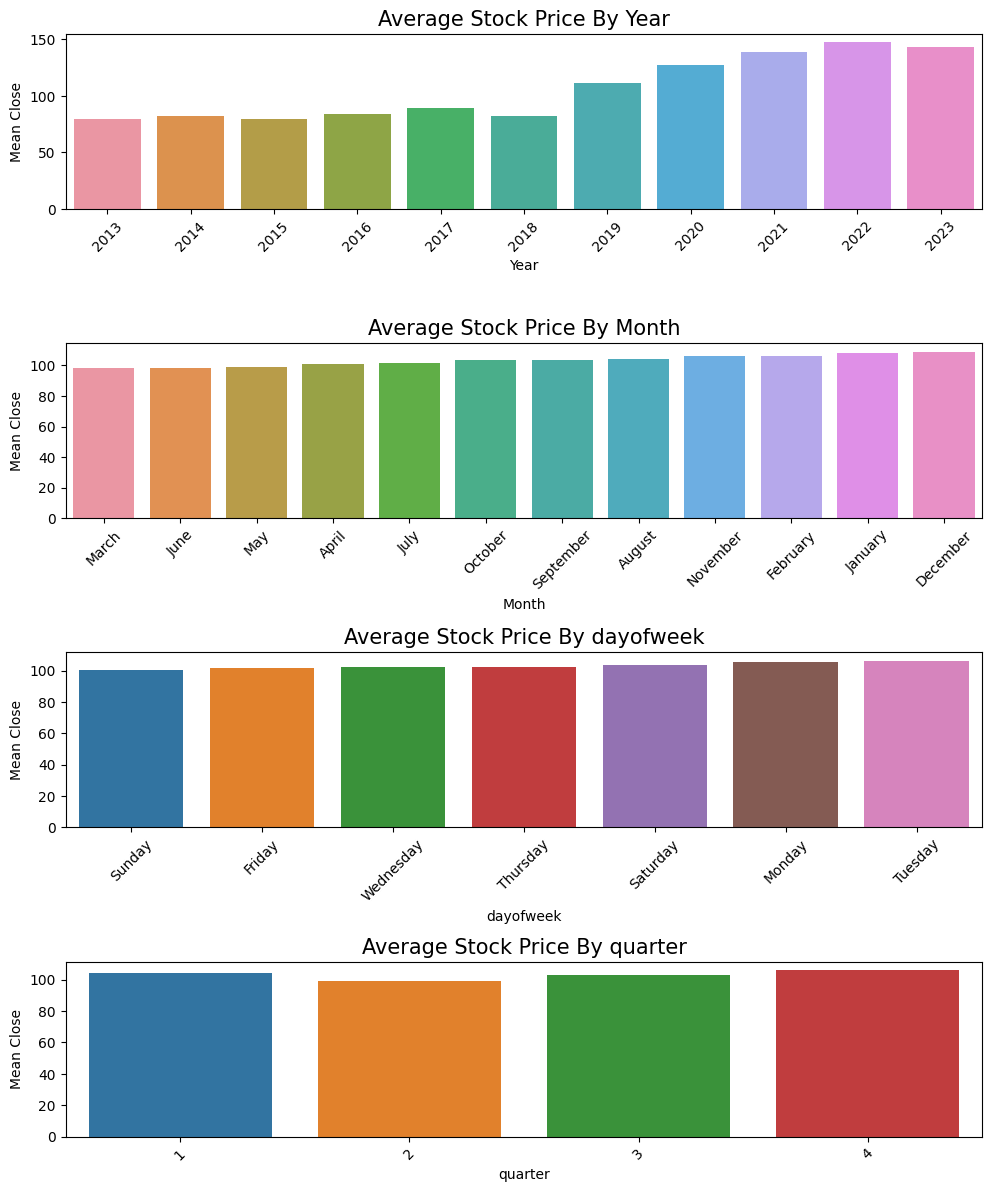

In [15]:
fig = plt.figure(figsize=(10,8))
fig.set_size_inches(10,12)
group_cols = monthly_data.columns

for enum,i in enumerate(group_cols[1:]):
  ax = fig.add_subplot(4,1,enum+1)
  Aggregated = pd.DataFrame(monthly_data.groupby(str(i))["Close"].mean()).reset_index().sort_values('Close')
  sns.barplot(data=Aggregated,x=str(i),y="Close",ax=ax)
  ax.set(xlabel=str(i), ylabel='Mean Close')
  ax.set_title("Average Stock Price By {}".format(str(i)),fontsize=15)
  plt.xticks(rotation=45)
  
plt.tight_layout(pad=1)

## We will only use certain indicators from the original dataset

In [16]:
stockCloseVolume = data.drop(columns=["Open", "High", "Low", "Adj Close", "200MA"]).copy()
stockCloseVolume

Close   Volume        30MA        50MA     EMA_0.3
2013-03-01   76.489998  9599700         NaN         NaN   76.489998
2013-03-04   76.680000  7631000         NaN         NaN   76.546999
2013-03-05   77.050003  9716200         NaN         NaN   76.697900
2013-03-06   77.199997  7194700         NaN         NaN   76.848529
2013-03-07   76.900002  7111400         NaN         NaN   76.863971
...                ...      ...         ...         ...         ...
2023-02-22  140.500000  6126300  142.477335  146.240201  139.659252
2023-02-23  140.050003  5835400  142.082668  146.022801  139.776477
2023-02-24  139.259995  5260700  141.702668  145.758600  139.621532
2023-02-27  139.139999  5820900  141.347001  145.496600  139.477073
2023-02-28  137.559998  6709900  140.903001  145.191000  138.901950

[2517 rows x 5 columns]

### Retrieve from FRED Database (US Economics and market data)

In [17]:
# Replace YOUR_API_KEY with your FRED API key
fred = Fred(api_key='47bd175ac2732acae3621b3c48848ff4')

# Retrieve daily close price of stock market indexes

sp500 = fred.get_series('SP500', observation_start = start_date, 
                        observation_end = end_date)

#Dow Jones Composite Average
djca = fred.get_series('DJCA', observation_start = start_date, 
                       observation_end = end_date) 

treasury_10y = fred.get_series('DGS10', observation_start = start_date, 
                               observation_end = end_date)

marketData = pd.DataFrame({'S&P500': sp500, 'DowJones': djca,
                        '10Y_Treasury_Rate': treasury_10y})

marketData = marketData.dropna()

marketData

S&P500  DowJones  10Y_Treasury_Rate
2013-03-28  1569.19   5036.94               1.87
2013-04-01  1562.17   5011.37               1.86
2013-04-02  1570.25   5011.22               1.88
2013-04-03  1553.69   4968.36               1.83
2013-04-04  1559.98   4987.32               1.78
...             ...       ...                ...
2023-02-23  4012.32  11180.26               3.88
2023-02-24  3970.04  11095.39               3.95
2023-02-27  3982.24  11141.21               3.92
2023-02-28  3970.15  11048.13               3.92
2023-03-01  3951.39  11031.18               4.01

[2480 rows x 3 columns]

In [18]:
combined_data = pd.concat([stockCloseVolume, marketData], axis=1).ffill()
combined_data

Close     Volume        30MA        50MA     EMA_0.3  \
2013-03-01   76.489998  9599700.0         NaN         NaN   76.489998   
2013-03-04   76.680000  7631000.0         NaN         NaN   76.546999   
2013-03-05   77.050003  9716200.0         NaN         NaN   76.697900   
2013-03-06   77.199997  7194700.0         NaN         NaN   76.848529   
2013-03-07   76.900002  7111400.0         NaN         NaN   76.863971   
...                ...        ...         ...         ...         ...   
2023-02-23  140.050003  5835400.0  142.082668  146.022801  139.776477   
2023-02-24  139.259995  5260700.0  141.702668  145.758600  139.621532   
2023-02-27  139.139999  5820900.0  141.347001  145.496600  139.477073   
2023-02-28  137.559998  6709900.0  140.903001  145.191000  138.901950   
2023-03-01  137.559998  6709900.0  140.903001  145.191000  138.901950   

             S&P500  DowJones  10Y_Treasury_Rate  
2013-03-01      NaN       NaN                NaN  
2013-03-04      NaN       NaN                NaN  
2013-03-05      NaN       NaN                NaN  
2013-03-06      NaN       NaN                NaN  
2013-03-07      NaN       NaN                NaN  
...             ...       ...                ...  
2023-02-23  4012.32  11180.26               3.88  
2023-02-24  3970.04  11095.39               3.95  
2023-02-27  3982.24  11141.21               3.92  
2023-02-28  3970.15  11048.13               3.92  
2023-03-01  3951.39  11031.18               4.01  

[2518 rows x 8 columns]

## TA-Lib Technical Indicators

In [19]:
# Compute the Relative Strength Index (RSI)
rsi = talib.RSI(data['Close'], timeperiod=14)

# Compute the Moving Average Convergence Divergence (MACD)
macd, macdsignal, macdhist = talib.MACD(data['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# Compute the Upper and Lower Bollinger Bands
upper, middle, lower = talib.BBANDS(data['Close'], timeperiod=20, nbdevup=2, nbdevdn=2)

# Compute Stochastic Oscillator
stochK, stochD = talib.STOCH(data['High'], data['Low'], data['Close'], 
                                  fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3)

# Compute Average Directional Index (ADX)
adx = talib.ADX(data['High'], data['Low'], data['Close'])

# Compute Chaikin Oscillator
chaikin = talib.ADOSC(data['High'], data['Low'], data['Close'], data['Volume'])

# Compute On-Balance Volume (OBV)
obv = talib.OBV(data['Close'], data['Volume'])

# Add the technical indicators to the DataFrame
combined_data['RSI'] = rsi
combined_data['MACD'] = macd
combined_data['MACD_Signal'] = macdsignal
combined_data['MACD_Histogram'] = macdhist
combined_data['Upper_Bollinger_Band'] = upper
combined_data['Middle_Bollinger_Band'] = middle
combined_data['Lower_Bollinger_Band'] = lower
combined_data['Stoch_K'] = stochK
combined_data['Stoch_D'] = stochD
combined_data['ADX'] = adx
combined_data['Chaikin_Osc'] = chaikin
combined_data['OBV'] = obv

combined_data

Close     Volume        30MA        50MA     EMA_0.3  \
2013-03-01   76.489998  9599700.0         NaN         NaN   76.489998   
2013-03-04   76.680000  7631000.0         NaN         NaN   76.546999   
2013-03-05   77.050003  9716200.0         NaN         NaN   76.697900   
2013-03-06   77.199997  7194700.0         NaN         NaN   76.848529   
2013-03-07   76.900002  7111400.0         NaN         NaN   76.863971   
...                ...        ...         ...         ...         ...   
2023-02-23  140.050003  5835400.0  142.082668  146.022801  139.776477   
2023-02-24  139.259995  5260700.0  141.702668  145.758600  139.621532   
2023-02-27  139.139999  5820900.0  141.347001  145.496600  139.477073   
2023-02-28  137.559998  6709900.0  140.903001  145.191000  138.901950   
2023-03-01  137.559998  6709900.0  140.903001  145.191000  138.901950   

             S&P500  DowJones  10Y_Treasury_Rate        RSI      MACD  \
2013-03-01      NaN       NaN                NaN        NaN       NaN   
2013-03-04      NaN       NaN                NaN        NaN       NaN   
2013-03-05      NaN       NaN                NaN        NaN       NaN   
2013-03-06      NaN       NaN                NaN        NaN       NaN   
2013-03-07      NaN       NaN                NaN        NaN       NaN   
...             ...       ...                ...        ...       ...   
2023-02-23  4012.32  11180.26               3.88  44.527093 -1.610144   
2023-02-24  3970.04  11095.39               3.95  42.215601 -1.542863   
2023-02-27  3982.24  11141.21               3.92  41.860146 -1.482140   
2023-02-28  3970.15  11048.13               3.92  37.395286 -1.543714   
2023-03-01  3951.39  11031.18               4.01        NaN       NaN   

            MACD_Signal  MACD_Histogram  Upper_Bollinger_Band  \
2013-03-01          NaN             NaN                   NaN   
2013-03-04          NaN             NaN                   NaN   
2013-03-05          NaN             NaN                   NaN   
2013-03-06          NaN             NaN                   NaN   
2013-03-07          NaN             NaN                   NaN   
...                 ...             ...                   ...   
2023-02-23    -1.991157        0.381013            143.528158   
2023-02-24    -1.901499        0.358635            143.429407   
2023-02-27    -1.817627        0.335487            143.377705   
2023-02-28    -1.762844        0.219130            143.342849   
2023-03-01          NaN             NaN                   NaN   

            Middle_Bollinger_Band  Lower_Bollinger_Band    Stoch_K    Stoch_D  \
2013-03-01                    NaN                   NaN        NaN        NaN   
2013-03-04                    NaN                   NaN        NaN        NaN   
2013-03-05                    NaN                   NaN        NaN        NaN   
2013-03-06                    NaN                   NaN        NaN        NaN   
2013-03-07                    NaN                   NaN        NaN        NaN   
...                           ...                   ...        ...        ...   
2023-02-23             140.215001            136.901843  75.176914  73.854343   
2023-02-24             140.120501            136.811595  67.206075  74.646117   
2023-02-27             140.049001            136.720296  51.125028  64.502672   
2023-02-28             139.876501            136.410152  30.101386  49.477496   
2023-03-01                    NaN                   NaN        NaN        NaN   

                  ADX   Chaikin_Osc          OBV  
2013-03-01        NaN           NaN    9599700.0  
2013-03-04        NaN           NaN   17230700.0  
2013-03-05        NaN           NaN   26946900.0  
2013-03-06        NaN           NaN   34141600.0  
2013-03-07        NaN           NaN   27030200.0  
...               ...           ...          ...  
2023-02-23  27.307917  2.888825e+06  713820900.0  
2023-02-24  26.754915  3.578905e+06  708560200.0  
2023-02-27  25.638294  2.848476e+06  702739300.0  

In [20]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2518 entries, 2013-03-01 to 2023-03-01
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2518 non-null   float64
 1   Volume                 2518 non-null   float64
 2   30MA                   2489 non-null   float64
 3   50MA                   2469 non-null   float64
 4   EMA_0.3                2518 non-null   float64
 5   S&P500                 2499 non-null   float64
 6   DowJones               2499 non-null   float64
 7   10Y_Treasury_Rate      2499 non-null   float64
 8   RSI                    2503 non-null   float64
 9   MACD                   2484 non-null   float64
 10  MACD_Signal            2484 non-null   float64
 11  MACD_Histogram         2484 non-null   float64
 12  Upper_Bollinger_Band   2498 non-null   float64
 13  Middle_Bollinger_Band  2498 non-null   float64
 14  Lower_Bollinger_Band   2498 non-null  

### Remove the null values at the front of the dataset caused by the technical indicators

In [21]:
filtered_data = combined_data[49:-1]
filtered_data

Close      Volume        30MA        50MA     EMA_0.3  \
2013-05-10   78.760002   6162500.0   78.697667   78.020200   78.274105   
2013-05-13   78.589996   5420200.0   78.727334   78.062200   78.368873   
2013-05-14   79.470001   6867400.0   78.744334   78.118000   78.699211   
2013-05-15   80.680000  11154400.0   78.829667   78.190600   79.293448   
2013-05-16   80.199997   8065600.0   78.885000   78.250600   79.565413   
...                ...         ...         ...         ...         ...   
2023-02-22  140.500000   6126300.0  142.477335  146.240201  139.659252   
2023-02-23  140.050003   5835400.0  142.082668  146.022801  139.776477   
2023-02-24  139.259995   5260700.0  141.702668  145.758600  139.621532   
2023-02-27  139.139999   5820900.0  141.347001  145.496600  139.477073   
2023-02-28  137.559998   6709900.0  140.903001  145.191000  138.901950   

             S&P500  DowJones  10Y_Treasury_Rate        RSI      MACD  \
2013-05-10  1633.70   5171.51               1.90  52.860986 -0.034965   
2013-05-13  1633.77   5153.04               1.92  51.854828 -0.003488   
2013-05-14  1650.34   5209.41               1.96  56.473247  0.091413   
2013-05-15  1658.78   5239.72               1.94  61.886999  0.261248   
2013-05-16  1650.47   5211.34               1.87  58.764508  0.353042   
...             ...       ...                ...        ...       ...   
2023-02-22  3991.05  11134.50               3.93  45.855100 -1.753036   
2023-02-23  4012.32  11180.26               3.88  44.527093 -1.610144   
2023-02-24  3970.04  11095.39               3.95  42.215601 -1.542863   
2023-02-27  3982.24  11141.21               3.92  41.860146 -1.482140   
2023-02-28  3970.15  11048.13               3.92  37.395286 -1.543714   

            MACD_Signal  MACD_Histogram  Upper_Bollinger_Band  \
2013-05-10    -0.008475       -0.026490             81.953428   
2013-05-13    -0.007478        0.003990             81.869350   
2013-05-14     0.012300        0.079113             81.791588   
2013-05-15     0.062090        0.199158             81.996112   
2013-05-16     0.120280        0.232762             82.039501   
...                 ...             ...                   ...   
2023-02-22    -2.086411        0.333375            143.674398   
2023-02-23    -1.991157        0.381013            143.528158   
2023-02-24    -1.901499        0.358635            143.429407   
2023-02-27    -1.817627        0.335487            143.377705   
2023-02-28    -1.762844        0.219130            143.342849   

            Middle_Bollinger_Band  Lower_Bollinger_Band    Stoch_K    Stoch_D  \
2013-05-10              78.667001             75.380573  82.031798  77.441192   
2013-05-13              78.614000             75.358651  76.455154  77.722503   
2013-05-14              78.582500             75.373413  90.109811  82.865588   
2013-05-15              78.663501             75.330890  89.140793  85.235253   
2013-05-16              78.680000             75.320500  86.793585  88.681397   
...                           ...                   ...        ...        ...   
2023-02-22             140.298501            136.922603  81.555363  69.331141   
2023-02-23             140.215001            136.901843  75.176914  73.854343   
2023-02-24             140.120501            136.811595  67.206075  74.646117   
2023-02-27             140.049001            136.720296  51.125028  64.502672   
2023-02-28             139.876501            136.410152  30.101386  49.477496   

                  ADX   Chaikin_Osc          OBV  
2013-05-10  14.920556  3.474773e+06   86210000.0  
2013-05-13  14.512798  3.219779e+06   80789800.0  
2013-05-14  14.676723  5.007838e+06   87657200.0  
2013-05-15  16.113202  7.348584e+06   98811600.0  
2013-05-16  17.447075  6.943679e+06   90746000.0  
...               ...           ...          ...  
2023-02-22  28.363451  3.621170e+06  719656300.0  
2023-02-23  27.307917  2.888825e+06  713820900.0  
2023-02-24  26.754915  3.578905e+06  7

In [22]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2468 entries, 2013-05-10 to 2023-02-28
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  2468 non-null   float64
 1   Volume                 2468 non-null   float64
 2   30MA                   2468 non-null   float64
 3   50MA                   2468 non-null   float64
 4   EMA_0.3                2468 non-null   float64
 5   S&P500                 2468 non-null   float64
 6   DowJones               2468 non-null   float64
 7   10Y_Treasury_Rate      2468 non-null   float64
 8   RSI                    2468 non-null   float64
 9   MACD                   2468 non-null   float64
 10  MACD_Signal            2468 non-null   float64
 11  MACD_Histogram         2468 non-null   float64
 12  Upper_Bollinger_Band   2468 non-null   float64
 13  Middle_Bollinger_Band  2468 non-null   float64
 14  Lower_Bollinger_Band   2468 non-null  

In [23]:
filtered_data.describe().applymap("{0:.5f}".format).T

count             mean              std  \
Close                  2468.00000        103.69216         26.65202   
Volume                 2468.00000    8440345.90762    5413365.15101   
30MA                   2468.00000        103.33216         26.45699   
50MA                   2468.00000        103.05861         26.28721   
EMA_0.3                2468.00000        103.63464         26.60616   
S&P500                 2468.00000       2806.39084        863.93217   
DowJones               2468.00000       8104.62135       2055.80968   
10Y_Treasury_Rate      2468.00000          2.18636          0.72363   
RSI                    2468.00000         52.32810         11.59254   
MACD                   2468.00000          0.18107          1.23978   
MACD_Signal            2468.00000          0.18392          1.16456   
MACD_Histogram         2468.00000         -0.00285          0.37392   
Upper_Bollinger_Band   2468.00000        106.86017         27.82263   
Middle_Bollinger_Band  2468.00000        103.45702         26.52705   
Lower_Bollinger_Band   2468.00000        100.05386         25.37606   
Stoch_K                2468.00000         53.87653         24.49800   
Stoch_D                2468.00000         53.89188         22.58924   
ADX                    2468.00000         23.61559          8.57271   
Chaikin_Osc            2468.00000     633641.12961    6608110.20100   
OBV                    2468.00000  341361700.28363  275091096.82192   

                                    min             25%              50%  \
Close                          68.06000        81.61000         90.09500   
Volume                    2022100.00000   6084525.00000    7354050.00000   
30MA                           70.31800        81.40792         89.45633   
50MA                           71.97400        81.24530         89.36530   
EMA_0.3                        68.63579        81.64473         90.18344   
S&P500                       1573.09000      2076.26250       2657.71000   
DowJones                     4918.16000      6271.99500       8040.60000   
10Y_Treasury_Rate               0.52000         1.72000          2.25500   
RSI                            11.70602        44.52692         53.01879   
MACD                           -5.16883        -0.42740          0.30480   
MACD_Signal                    -4.09769        -0.39268          0.29783   
MACD_Histogram                 -1.69930        -0.20010          0.00702   
Upper_Bollinger_Band           71.67172        83.65615         92.57224   
Middle_Bollinger_Band          69.64300        81.45562         89.72225   
Lower_Bollinger_Band           66.03717        79.43636         87.36620   
Stoch_K                         0.65429        33.40643         56.23805   
Stoch_D                         2.38024        35.45073         56.13255   
ADX                             9.10721        17.08511         22.10591   
Chaikin_Osc             -20687060.13337  -3108841.54171     484018.11757   
OBV                    -159851400.00000  86585350.00000  267824400.00000   

                                   75%              max  
Close                        128.37250        164.21001  
Volume                   9310725.00000  123735700.00000  
30MA                         128.64100        161.28467  
50MA                         129.14280        160.10260  
EMA_0.3                      128.23440        163.27639  
S&P500                      3381.09750       4796.56000  
DowJones                    9490.42750      12360.33000  
10Y_Treasury_Rate              2.69000          4.25000  
RSI                           61.09211         82.36928  
MACD                           0.88235          4.05146  
MACD_Signal                    0.85271          3.83466  
MACD_Histogram                 0.19077          1.70604  
Upper_Bollinger_Band         132.66514        166.66491  
Middle_Bollinger_Band        128.11737        161.62200  
Lower_Bollinger_Band         122.86944        157.51543  
Stoch_K    

<AxesSubplot:>

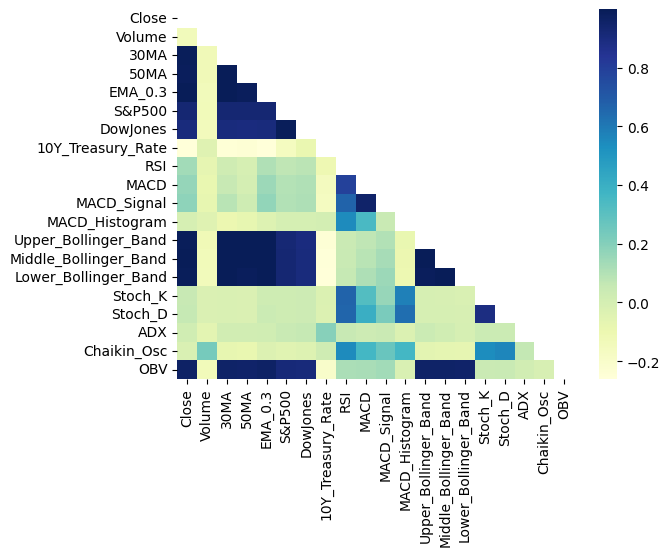

In [24]:
mask = np.triu(np.ones_like(filtered_data.corr()))
sns.heatmap(filtered_data.corr(), mask=mask, cmap="YlGnBu")

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# data['Date'] = pd.to_datetime(data['Date']).astype('int32')
scaler = StandardScaler()

# columns = ['Volume','30MA','50MA','EMA_0.3','S&P500','DowJones','10Y_Treasury_Rate','RSI', 'MACD', 'MACD_Signal','MACD_Histogram',
#            'Upper_Bollinger_Band','Middle_Bollinger_Band','Lower_Bollinger_Band',
#            'Stoch_K','Stoch_D','ADX','Chaikin_Osc','OBV']
# X = filtered_data[columns]
X = filtered_data.drop(columns=["Close"]).copy()
X = scaler.fit_transform(X)

y = pd.DataFrame(filtered_data['Close'])
# y = scaler.fit_transform(y)

print(X.shape)
print(y.shape)

(2468, 19)
(2468, 1)


### Dimensionality Reduction using Principal Component Analysis (PCA)

In [26]:
from sklearn.decomposition import PCA

n_components = len(filtered_data.columns)-1
pca = PCA(n_components = n_components).fit(X)

np.set_printoptions(suppress=True)
np.round(pca.explained_variance_ratio_, 2)

array([0.46, 0.22, 0.08, 0.06, 0.06, 0.04, 0.03, 0.02, 0.01, 0.01, 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

#### Especially with time series data, because the sequence of values is important, we do not distribute the dataset into training and test sets in random fashion. Instead, we select an arbitrary split point in the ordered list of observations.

#### Hence, shuffle = False for train_test_split is a very crucial step.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1727, 19)
(1727, 1)
(741, 19)
(741, 1)


In [28]:
def evaluate_model_rmse(model_type, test_size=0.3):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=False)
    model = model_type
    model.fit(X_train, y_train)
    y_predict = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_predict, squared=False)
    return rmse

evaluate_model_rmse(LinearRegression())

0.9696779056719275

#### Instead of a vanilla linear regression, a comprehensive alternative is to use the LazyRegressor library to demonstrate the efficiency of various ML algorithms with just a few lines of codes.

In [29]:
from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = reg.fit(X_train, X_test, y_train, y_test)

models

100%|██████████████████████████████████████████████████████████████████████████████████| 42/42 [03:23<00:00,  4.85s/it]


Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
RidgeCV                                      0.99       0.99   0.95   
LassoLarsCV                                  0.99       0.99   0.96   
BayesianRidge                                0.99       0.99   0.96   
LassoLarsIC                                  0.99       0.99   0.97   
LinearRegression                             0.99       0.99   0.97   
TransformedTargetRegressor                   0.99       0.99   0.97   
Ridge                                        0.99       0.99   0.98   
SGDRegressor                                 0.99       0.99   0.99   
RANSACRegressor                              0.99       0.99   1.05   
LassoCV                                      0.99       0.99   1.05   
ElasticNetCV                                 0.99       0.99   1.09   
LinearSVR                                    0.99       0.99   1.13   
OrthogonalMatchingPursuitCV                  0.99       0.99   1.14   
HuberRegressor                               0.99       0.99   1.14   
LarsCV                                       0.99       0.99   1.20   
OrthogonalMatchingPursuit                    0.98       0.98   1.61   
PassiveAggressiveRegressor                   0.98       0.98   1.86   
Lasso                                        0.88       0.88   4.15   
GammaRegressor                               0.87       0.88   4.23   
PoissonRegressor                             0.71       0.72   6.32   
ElasticNet                                   0.62       0.63   7.25   
TweedieRegressor                             0.49       0.50   8.47   
BaggingRegressor                            -1.18      -1.13  17.47   
RandomForestRegressor                       -1.25      -1.19  17.72   
DecisionTreeRegressor                       -1.29      -1.24  17.91   
ExtraTreesRegressor                         -1.35      -1.29  18.13   
LGBMRegressor                               -1.37      -1.31  18.19   
GradientBoostingRegressor                   -1.37      -1.31  18.20   
HistGradientBoostingRegressor               -1.38      -1.32  18.23   
XGBRegressor                                -1.41      -1.34  18.33   
ExtraTreeRegressor                          -1.41      -1.35  18.37   
KNeighborsRegressor                         -1.61      -1.54  19.10   
AdaBoostRegressor                           -1.80      -1.73  19.79   
MLPRegressor                                -5.95      -5.77  31.17   
NuSVR                                      -13.14     -12.78  44.45   
SVR                                        -13.24     -12.87  44.61   
LassoLars                                  -18.56     -18.06  52.28   
DummyRegressor                             -18.56     -18.06  52.28   
QuantileRegressor                          -21.91     -21.32  56.59   
KernelRidge                                -54.83     -53.39  88.33   
GaussianProcessRegressor                  -138.22    -134.65 139.49   
Lars                                      -161.66    -157.48 150.78   

                               Time Taken  
Model                                      
RidgeCV                              0.02  
LassoLarsCV                          0.05  
BayesianRidge                        0.02  
LassoLarsIC                          0.02  
LinearRegression                     0.02  
TransformedTargetRegressor           0.02  
Ridge                                0.01  
SGDRegressor                         0.03  
RANSACRegressor                      0.02  
LassoCV                              0.12  
ElasticNetCV                         0.11  
LinearSVR                            0.08  
OrthogonalMatchingPursuitCV          0.02  
HuberRegressor                       0.09  
LarsCV                               0.04  
OrthogonalMatchingPursuit            0.02  
PassiveAggressiveRegressor           0.01  
Lasso                                0.01  
GammaRegressor            

# Regression & ensemble learning

In [30]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neural_network import MLPRegressor

In [31]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))
models.append(('BR', BaggingRegressor()))
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('ETR', ExtraTreesRegressor()))
models.append(('XGB', XGBRegressor()))
models.append(('LGBM', LGBMRegressor()))
models.append(('CBR', CatBoostRegressor(silent=True)))
models.append(('MLP', MLPRegressor()))

In [32]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

#### Instead of KFold, TimeSeriesSplit is used due to the sequential nature of the dataset.

In [33]:
model_names, TS_split_results, test_results, train_results = [], [], [], []
num_folds = 5
scoring = 'neg_mean_squared_error'
row_list=[]
# results = pd.DataFrame(columns=['Names','CV_mean','CV_std','Train_RMSE','Test_RMSE'])

print("Model | Mean | Std | Train Results | Test Results")

for name, model in models:
    model_names.append(name)
    TS_split = TimeSeriesSplit(n_splits=num_folds)

    #converted mean square error to positive before converting to RMSE
    cv_results = np.sqrt(-1 * cross_val_score(model, X_train, y_train, cv=TS_split, scoring=scoring))
    TS_split_results.append(cv_results)

    # Full Training period
    res = model.fit(X_train, y_train)
    train_result = mean_squared_error(y_train, res.predict(X_train), squared=False)
    train_results.append(train_result)

    # Test results
    test_result = mean_squared_error(y_test, res.predict(X_test), squared=False)
    test_results.append(test_result)

    dict1={'Names':name,'CV_mean':cv_results.mean(),'CV_std':cv_results.std(),'Train_RMSE':train_result,'Test_RMSE':test_result}
    row_list.append(dict1)
    # results.append({'names':[name],'CV_mean':[cv_results.mean()],'CV_std': [cv_results.std()],'train_RMSE': [train_result], 'test_RMSE':[test_result]},ignore_index=True)
    
    model_comparisons = "%s: %f %f %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(model_comparisons)

Model | Mean | Std | Train Results | Test Results
LR: 0.624254 0.291671 0.453793 0.969678
LASSO: 10.089214 8.419052 2.371644 10.224939
RIDGE: 0.820757 0.437040 0.478519 0.995543
EN: 9.844352 8.210797 3.621022 16.384610
KNR: 8.797573 7.750160 1.033680 20.757719
CART: 5.655403 7.359837 0.000000 17.651466
SVR: 7.103711 8.036627 1.631471 39.068642
RFR: 5.494818 8.033306 0.247999 17.636636
BR: 5.571734 7.706538 0.275505 17.902241
ABR: 5.647339 8.149256 1.008361 19.816250
GBR: 5.716894 8.491951 0.290489 18.225125
ETR: 5.681137 8.488885 0.000000 18.307699
XGB: 5.669009 8.449438 0.042641 18.333426
LGBM: 5.896632 8.577644 0.209541 18.067760
CBR: 6.462997 8.684175 0.113804 21.503499
MLP: 36.560443 19.297056 9.772618 55.287550


In [34]:
results = pd.DataFrame(row_list)
results = results.set_index('Names')
results.round(4)
results

CV_mean  CV_std  Train_RMSE  Test_RMSE
Names                                        
LR        0.62    0.29        0.45       0.97
LASSO    10.09    8.42        2.37      10.22
RIDGE     0.82    0.44        0.48       1.00
EN        9.84    8.21        3.62      16.38
KNR       8.80    7.75        1.03      20.76
CART      5.66    7.36        0.00      17.65
SVR       7.10    8.04        1.63      39.07
RFR       5.49    8.03        0.25      17.64
BR        5.57    7.71        0.28      17.90
ABR       5.65    8.15        1.01      19.82
GBR       5.72    8.49        0.29      18.23
ETR       5.68    8.49        0.00      18.31
XGB       5.67    8.45        0.04      18.33
LGBM      5.90    8.58        0.21      18.07
CBR       6.46    8.68        0.11      21.50
MLP      36.56   19.30        9.77      55.29

#### Ensemble learning methods generally outperform regression techniques, with multi-layer preceptron performing the worst when evaluating RMSE.

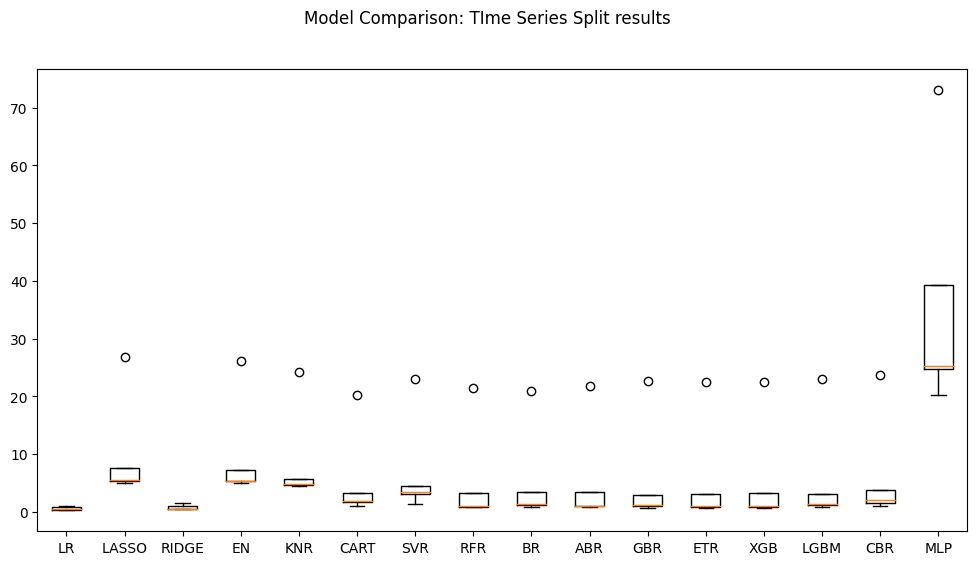

In [35]:
fig = plt.figure()
fig.suptitle('Model Comparison: TIme Series Split results')
ax = fig.add_subplot(111)
plt.boxplot(TS_split_results)
ax.set_xticklabels(model_names)
fig.set_size_inches(12, 6)
plt.show()

In [36]:
def plot_models_RMSE(model_names=model_names, train_results=train_results, test_results=test_results):
    fig = plt.figure()
    ind = np.arange(len(model_names))
    width = 0.1
    ax = fig.add_subplot(111)

    plt.bar(ind - width/2, train_results, width=width, label='Train Error')
    plt.bar(ind + width/2, test_results, width=width, label='Test Error')
    plt.legend()
    ax.set_xticks(ind)
    ax.set_xticklabels(model_names)
    plt.ylabel('Root Mean Square Error')
    fig.set_size_inches(12, 6)
    plt.show()

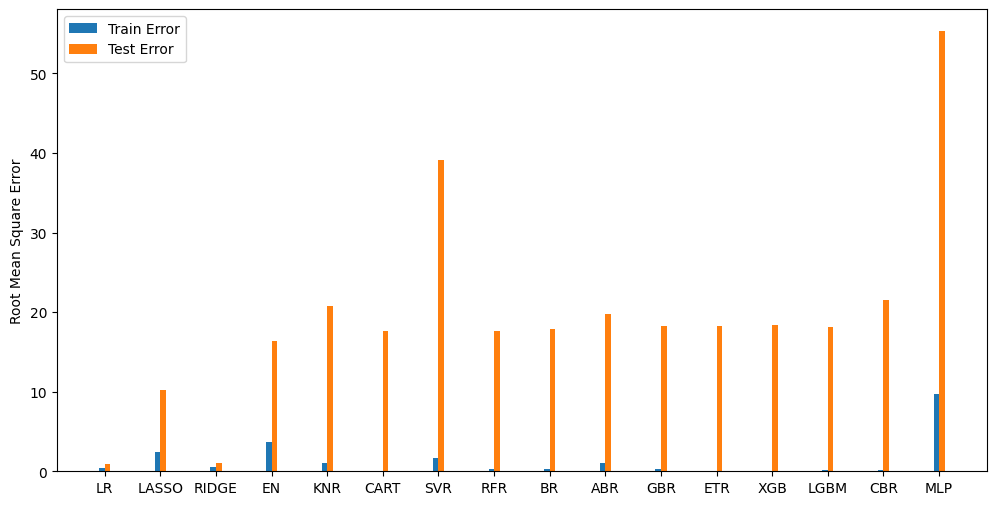

In [37]:
plot_models_RMSE()

# ARIMA

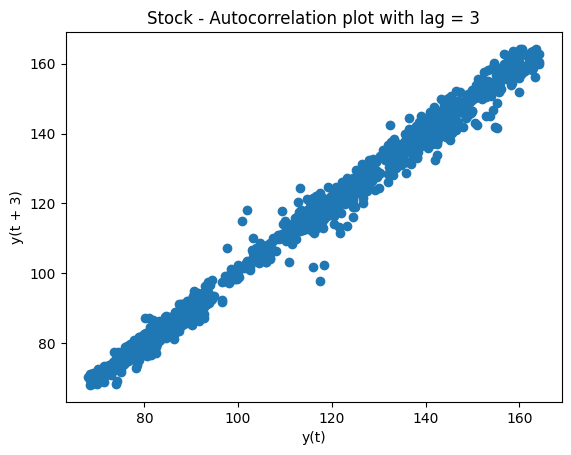

In [38]:
from pandas.plotting import lag_plot

plt.figure()
lag_plot(data['Close'], lag=3)
plt.title('Stock - Autocorrelation plot with lag = 3')
plt.show()

In [39]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import itertools

In [40]:
result = adfuller(y)
print(result,'\n')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')  

for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))
if result[0] < result[4]["5%"]:
    print ("\nReject Ho - Time Series is Stationary")
else:
    print ("\nFailed to Reject Ho - Time Series is Non-Stationary")

(-0.9536301075151419, 0.7697989421229776, 18, 2449, {'1%': -3.4330229961087557, '5%': -2.8627209046733073, '10%': -2.5673986431191405}, 8110.866847651483) 

ADF Statistic: -0.9536301075151419
n_lags: 0.7697989421229776
p-value: 0.7697989421229776
Critial Values:
   1%, -3.4330229961087557
Critial Values:
   5%, -2.8627209046733073
Critial Values:
   10%, -2.5673986431191405
	1%: -3.433
	5%: -2.863
	10%: -2.567

Failed to Reject Ho - Time Series is Non-Stationary


#### ACF measures the average correlation between data points and their previous values for different lag lengths.
#### PACF is similar to ACF except that each partial correlation controls for any correlation between observations of a shorter lag length.

Text(0.5, 0, 'Lags')

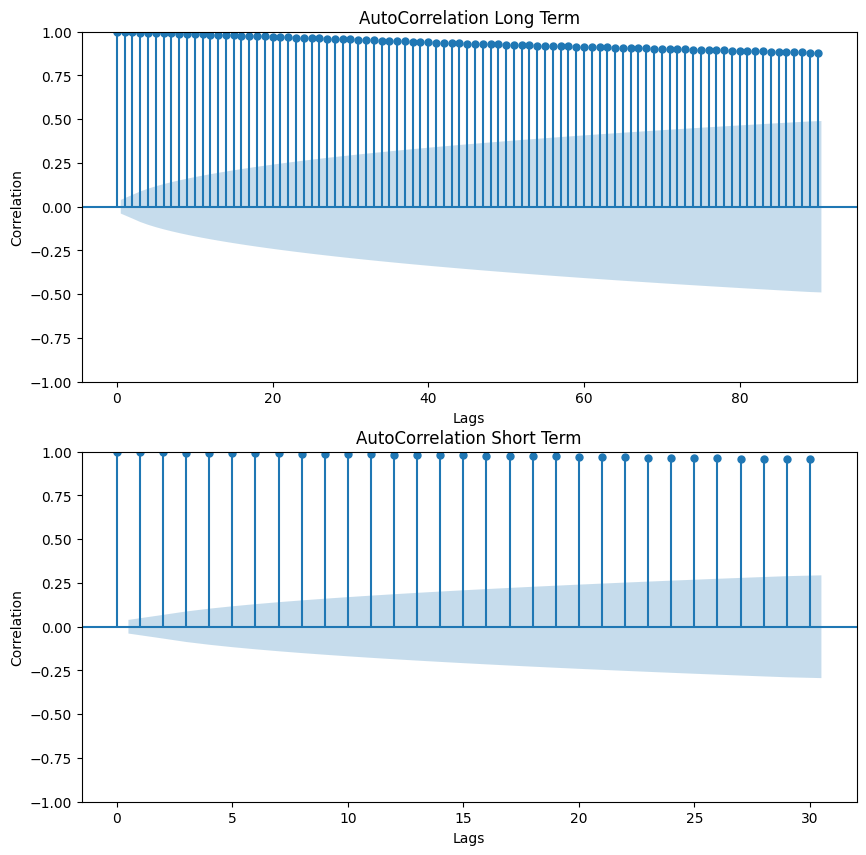

In [41]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

acf = plot_acf(data['Close'],lags=90,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(data['Close'],lags=30,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

Text(0.5, 0, 'Lags')

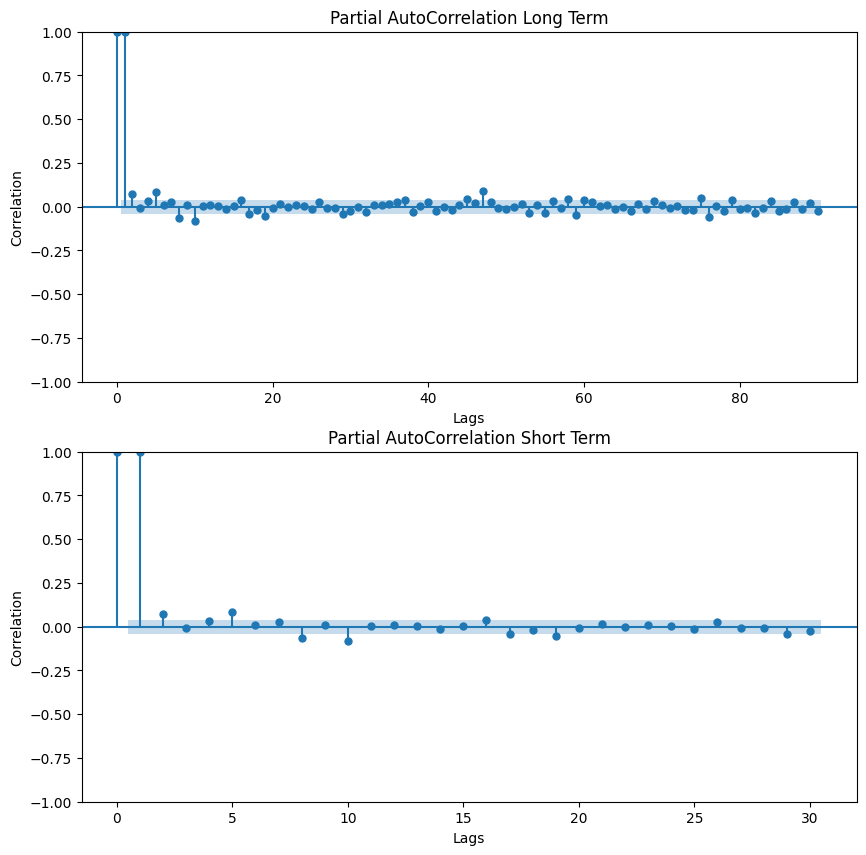

In [42]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(10,10))

pacf = plot_pacf(data['Close'],lags=90,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(data['Close'],lags=30,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')

ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

<Figure size 640x480 with 0 Axes>

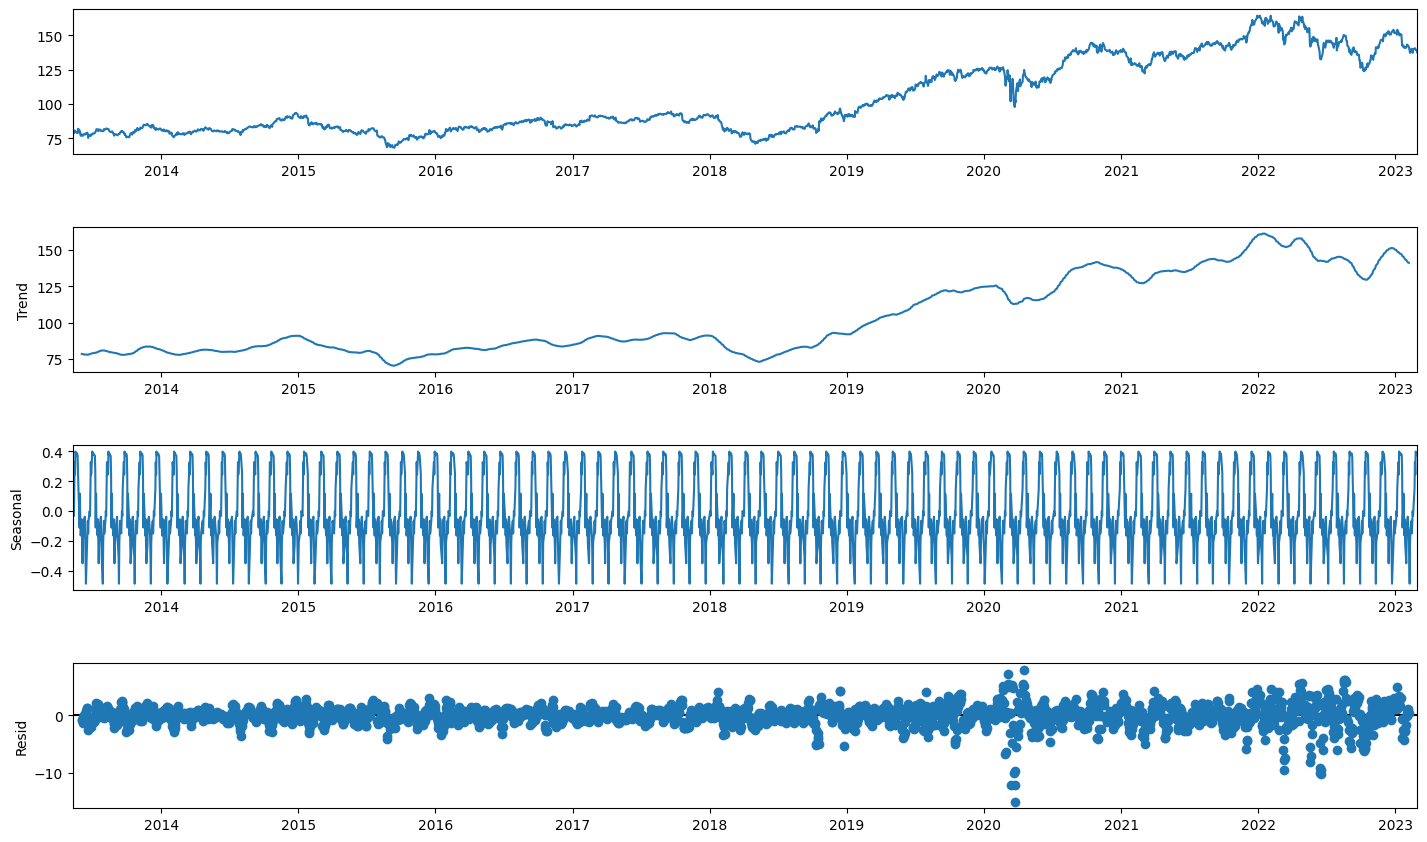

In [43]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(y, model='addictivee', period=30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

In [44]:
p = d = q = range(3)
# p = d = range(3)
# q = range(5)
pdq = list(itertools.product(p, d, q))
print(len(pdq))
print(pdq)

27
[(0, 0, 0), (0, 0, 1), (0, 0, 2), (0, 1, 0), (0, 1, 1), (0, 1, 2), (0, 2, 0), (0, 2, 1), (0, 2, 2), (1, 0, 0), (1, 0, 1), (1, 0, 2), (1, 1, 0), (1, 1, 1), (1, 1, 2), (1, 2, 0), (1, 2, 1), (1, 2, 2), (2, 0, 0), (2, 0, 1), (2, 0, 2), (2, 1, 0), (2, 1, 1), (2, 1, 2), (2, 2, 0), (2, 2, 1), (2, 2, 2)]


In [45]:
import warnings
warnings.filterwarnings("ignore")

In [46]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.predict(end=len(y_test)-1)
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 13.25000 | Test RMSE: 52.28108
Model (0, 0, 1) | Train RMSE: 6.95529 | Test RMSE: 55.89977
Model (0, 0, 2) | Train RMSE: 4.39061 | Test RMSE: 57.48306
Model (0, 1, 0) | Train RMSE: 2.16984 | Test RMSE: 59.87786
Model (0, 1, 1) | Train RMSE: 2.16342 | Test RMSE: 59.87731
Model (0, 1, 2) | Train RMSE: 2.16340 | Test RMSE: 59.87726
Model (0, 2, 0) | Train RMSE: 2.65485 | Test RMSE: 59.88644
Model (0, 2, 1) | Train RMSE: 2.37011 | Test RMSE: 59.87167
Model (0, 2, 2) | Train RMSE: 2.36422 | Test RMSE: 59.86965
Model (1, 0, 0) | Train RMSE: 1.08130 | Test RMSE: 59.74251
Model (1, 0, 1) | Train RMSE: 1.06864 | Test RMSE: 59.74829
Model (1, 0, 2) | Train RMSE: 1.06861 | Test RMSE: 59.74801
Model (1, 1, 0) | Train RMSE: 2.16361 | Test RMSE: 59.87743
Model (1, 1, 1) | Train RMSE: 2.16296 | Test RMSE: 59.87676
Model (1, 1, 2) | Train RMSE: 2.16081 | Test RMSE: 59.87725
Model (1, 2, 0) | Train RMSE: 2.49659 | Test RMSE: 59.88437
Model (1, 2, 1) | Train RMSE: 2.36440 |

In [47]:
ARIMA_train_best, ARIMA_test_best, best_pdq = float("inf"), float("inf"), None

for param in pdq:
    arima = ARIMA(y_train, order=param).fit()
    ARIMA_train_results = mean_squared_error(y_train, arima.fittedvalues, squared=False)
    
    output = arima.forecast(steps=len(y_test))
    ARIMA_test_results = mean_squared_error(y_test, output, squared=False)
    
    if ARIMA_test_results < ARIMA_test_best:
            ARIMA_train_best, ARIMA_test_best, best_pdq = ARIMA_train_results, ARIMA_test_results, param

    print(f'Model {param} | Train RMSE: {ARIMA_train_results :.5f} | Test RMSE: {ARIMA_test_results :.5f}')
print(f"\nBest ARIMA Model: {best_pdq} | Train RMSE: {ARIMA_train_best :.5f} | Test RMSE: {ARIMA_test_best :.5f}")

Model (0, 0, 0) | Train RMSE: 13.25000 | Test RMSE: 52.28108
Model (0, 0, 1) | Train RMSE: 6.95529 | Test RMSE: 52.27521
Model (0, 0, 2) | Train RMSE: 4.39061 | Test RMSE: 52.28807
Model (0, 1, 0) | Train RMSE: 2.16984 | Test RMSE: 30.88965
Model (0, 1, 1) | Train RMSE: 2.16342 | Test RMSE: 29.91575
Model (0, 1, 2) | Train RMSE: 2.16340 | Test RMSE: 29.87621
Model (0, 2, 0) | Train RMSE: 2.65485 | Test RMSE: 2863.34103
Model (0, 2, 1) | Train RMSE: 2.37011 | Test RMSE: 23.79527
Model (0, 2, 2) | Train RMSE: 2.36422 | Test RMSE: 22.62713
Model (1, 0, 0) | Train RMSE: 1.08130 | Test RMSE: 43.80815
Model (1, 0, 1) | Train RMSE: 1.06864 | Test RMSE: 39.40377
Model (1, 0, 2) | Train RMSE: 1.06861 | Test RMSE: 39.43215
Model (1, 1, 0) | Train RMSE: 2.16361 | Test RMSE: 30.06260
Model (1, 1, 1) | Train RMSE: 2.16296 | Test RMSE: 29.79687
Model (1, 1, 2) | Train RMSE: 2.16081 | Test RMSE: 29.56496
Model (1, 2, 0) | Train RMSE: 2.49659 | Test RMSE: 1958.92225
Model (1, 2, 1) | Train RMSE: 2.364

In [48]:
train_results.append(ARIMA_train_best)
test_results.append(ARIMA_test_best)
model_names.append("ARIMA")

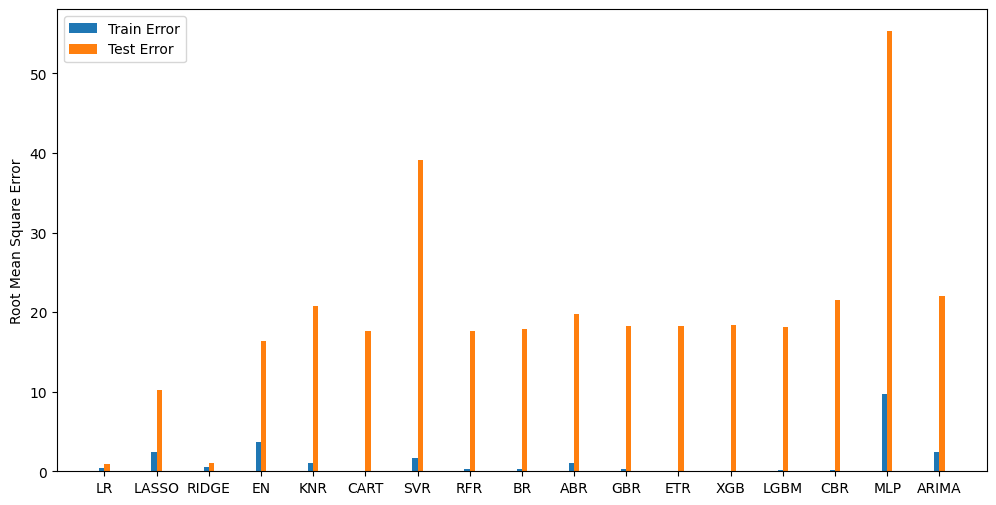

In [49]:
plot_models_RMSE()

#### It can be inferred from the graph above that ARIMA performs worse than ensemble learning methods.

In [50]:
model = ARIMA(y_train, order=best_pdq)
fitted = model.fit()  
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1727
Model:                 ARIMA(2, 2, 2)   Log Likelihood               -2512.897
Date:                Tue, 28 Mar 2023   AIC                           5035.794
Time:                        18:27:24   BIC                           5063.059
Sample:                             0   HQIC                          5045.880
                               - 1727                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0089      0.022    -45.793      0.000      -1.052      -0.966
ar.L2         -0.2025      0.007    -27.100      0.000      -0.217      -0.188
ma.L1         -0.1499      0.054     -2.772      0.0

#### Alternatively, the most accurate ARIMA model can be configured below.

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5092.634, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5052.155, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5050.793, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5091.167, Time=0.04 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5049.292, Time=0.50 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=5029.891, Time=0.56 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5052.918, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=5025.552, Time=1.26 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=5054.368, Time=0.16 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=5029.192, Time=0.99 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=5017.016, Time=1.66 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5036.730, Time=0.82 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=5035.874, Time=1.50 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=5035.282, Time=0.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept

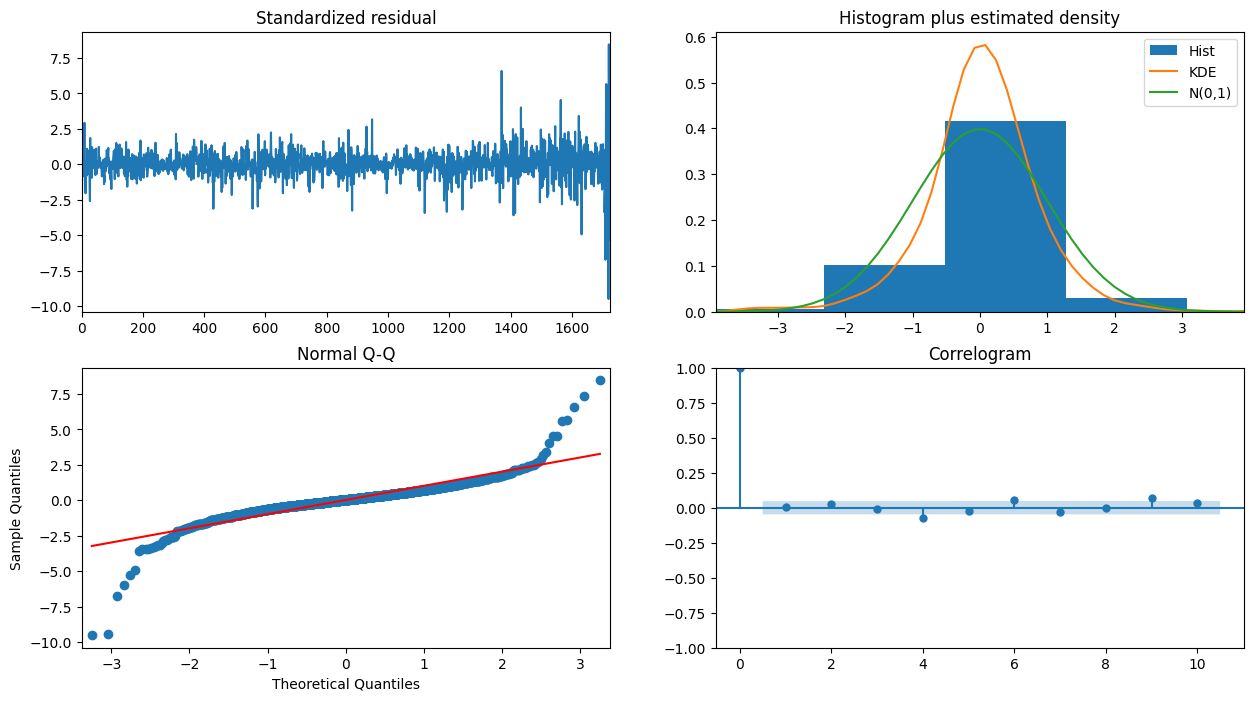

In [51]:
from pmdarima.arima import auto_arima

model_autoARIMA = auto_arima(y_train, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# PyTorch LSTM

In [52]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

In [53]:
scaler = MinMaxScaler()
ClosePrice = pd.DataFrame(data['Close'])

# Create training and testing datasets (70% train & 30% test)
train_split, test_split = train_test_split(ClosePrice, test_size=0.3, shuffle=False)
train = scaler.fit_transform(train_split)
test = scaler.fit_transform(test_split)

print(train.shape)
print(test.shape)

(1761, 1)
(756, 1)


#### For time series in LSTM, a "look back period" can be specified to predict the subsequent timestep value.

In [54]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

look_back = 10
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  (1750, 10)
trainY.shape =  (1750,)
testX.shape =  (745, 10)
testY.shape =  (745,)


#### The values to feed into the LSTM must be converted into tensors beforehand.

In [55]:
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
trainY = np.reshape(trainY, (trainY.shape[0], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))
testY = np.reshape(testY, (testY.shape[0], 1))

# Convert data to PyTorch tensors
trainX = torch.from_numpy(trainX).float()
trainY = torch.from_numpy(trainY).float()
testX = torch.from_numpy(testX).float()
testY = torch.from_numpy(testY).float()

print('trainX.shape = ',trainX.shape)
print('trainY.shape = ',trainY.shape)
print('testX.shape = ',testX.shape)
print('testY.shape = ',testY.shape)

trainX.shape =  torch.Size([1750, 10, 1])
trainY.shape =  torch.Size([1750, 1])
testX.shape =  torch.Size([745, 10, 1])
testY.shape =  torch.Size([745, 1])


In [56]:
input_dim = 1 # The number of expected features in the input x (1 for univariate analysis)
hidden_dim = 50 # The number of features in the hidden state h
num_layers = 3 # Number of recurrent layers to formed a stacked LSTM
output_dim = 1
dropout_prob = 0.1
num_epochs = 100
learning_rate = 0.01

In [57]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout_prob):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout_prob) # bidirectional=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim)
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [58]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)

print("Model's state_dict:")
for param_tensor in lstm_model.state_dict():
    print(param_tensor, "\t", lstm_model.state_dict()[param_tensor].size())

Model's state_dict:
lstm.weight_ih_l0 	 torch.Size([200, 1])
lstm.weight_hh_l0 	 torch.Size([200, 50])
lstm.bias_ih_l0 	 torch.Size([200])
lstm.bias_hh_l0 	 torch.Size([200])
lstm.weight_ih_l1 	 torch.Size([200, 50])
lstm.weight_hh_l1 	 torch.Size([200, 50])
lstm.bias_ih_l1 	 torch.Size([200])
lstm.bias_hh_l1 	 torch.Size([200])
lstm.weight_ih_l2 	 torch.Size([200, 50])
lstm.weight_hh_l2 	 torch.Size([200, 50])
lstm.bias_ih_l2 	 torch.Size([200])
lstm.bias_hh_l2 	 torch.Size([200])
fc.weight 	 torch.Size([1, 50])
fc.bias 	 torch.Size([1])


#### Training the LSTM Model

In [59]:
lstm_model = LSTM(input_dim, hidden_dim, num_layers, output_dim, dropout_prob)
criterion = nn.MSELoss(reduction='mean')
optimizer = torch.optim.Adam(lstm_model.parameters(), lr=learning_rate)
hist = np.zeros(num_epochs)

for epoch in range(1, num_epochs+1):
    
    lstm_model.train()
    
    trainY_pred = lstm_model(trainX)
    loss = torch.sqrt(criterion(trainY_pred, trainY))
    hist[epoch-1] = loss.item()
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}/{num_epochs}, Loss: {loss.item():.4f}")

Epoch: 10/100, Loss: 0.1550
Epoch: 20/100, Loss: 0.0826
Epoch: 30/100, Loss: 0.0519
Epoch: 40/100, Loss: 0.0385
Epoch: 50/100, Loss: 0.0320
Epoch: 60/100, Loss: 0.0310
Epoch: 70/100, Loss: 0.0267
Epoch: 80/100, Loss: 0.0276
Epoch: 90/100, Loss: 0.0258
Epoch: 100/100, Loss: 0.0248


In [60]:
train_actual = pd.DataFrame(scaler.inverse_transform(trainY.detach().numpy()))
print(train_actual.head())
train_pred = pd.DataFrame(scaler.inverse_transform(trainY_pred.detach().numpy()))
print(train_pred.head())

LSTM_train_RMSE = mean_squared_error(train_pred, train_actual, squared=False)
print()
print('LSTM Train RMSE:',LSTM_train_RMSE)

       0
0 107.02
1 106.82
2 107.89
3 108.42
4 108.00
       0
0 107.71
1 108.20
2 107.50
3 107.95
4 107.19

LSTM Train RMSE: 1.6495571


#### Plotting the error loss of all epochs

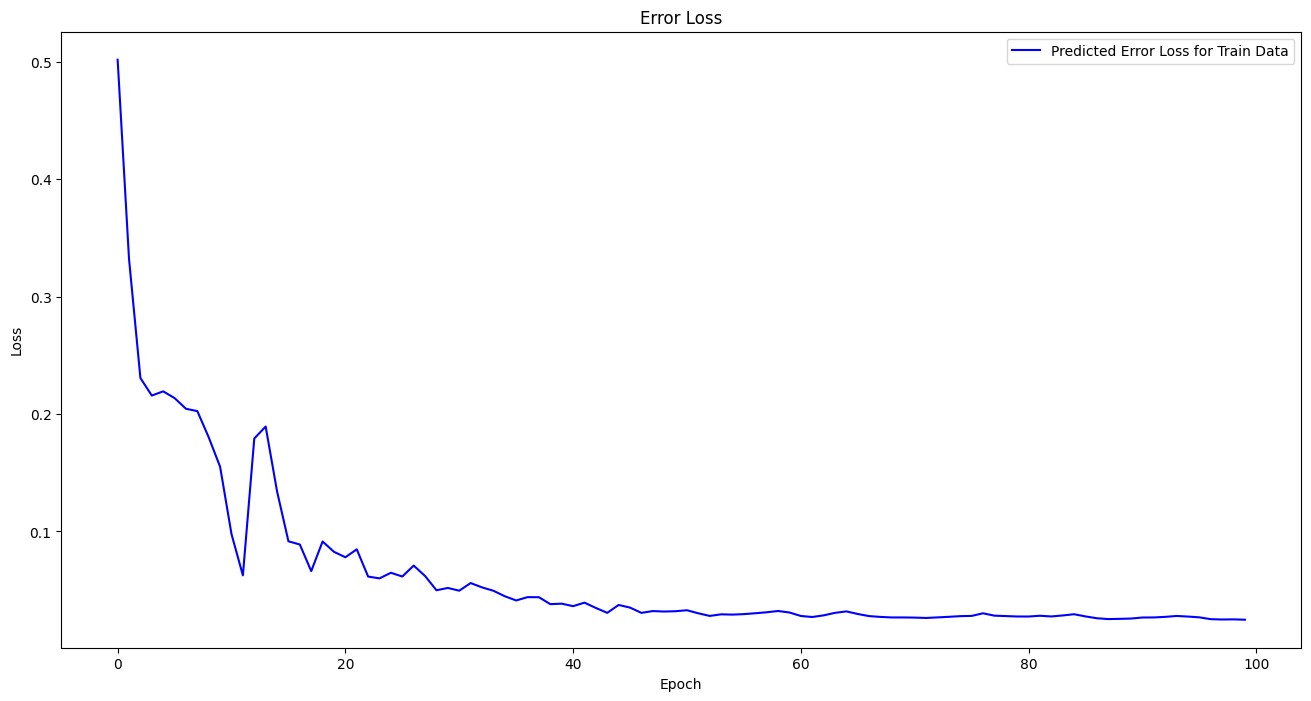

In [61]:
epochs = np.arange(num_epochs)
plt.figure(figsize=(16,8))
plt.plot(epochs, hist, color = 'blue', label = 'Predicted Error Loss for Train Data')
plt.title('Error Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Plotting the actual and predicted Close Price in the training phase
Accuracy can be improved by tuning the "look back period" specified earlier.

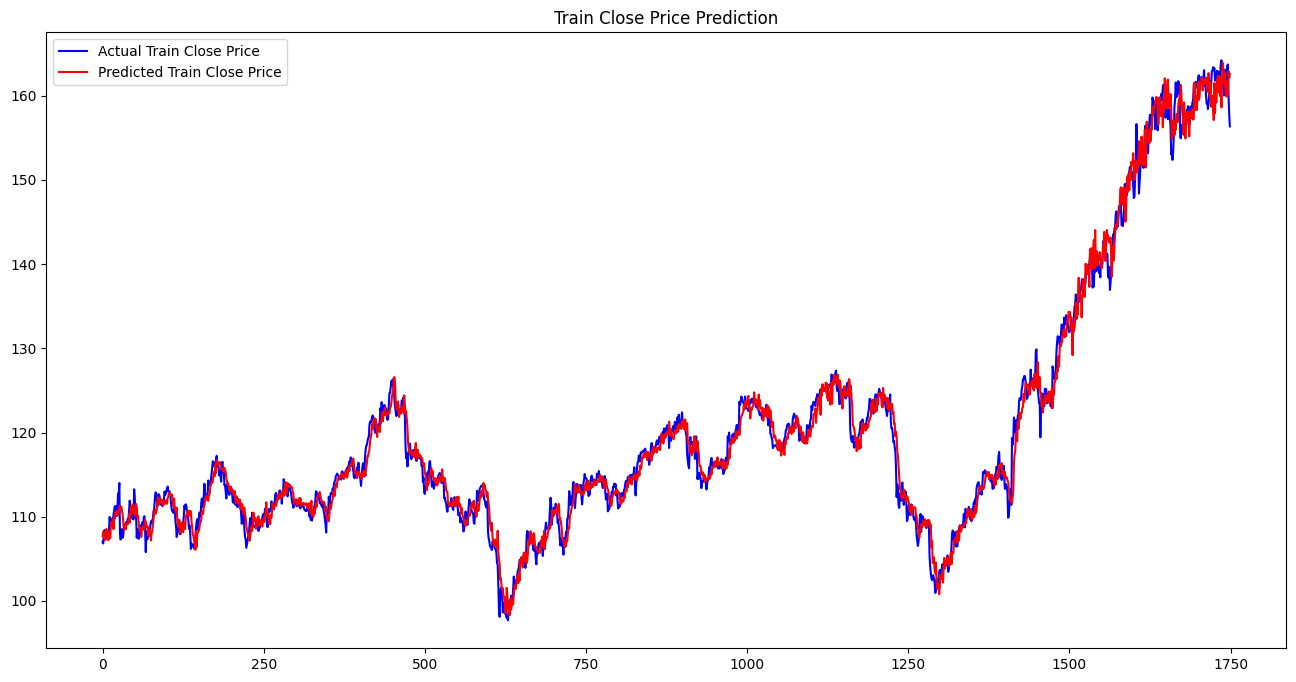

In [62]:
plt.figure(figsize=(16,8))
plt.plot(train_actual, color = 'blue', label = 'Actual Train Close Price')
plt.plot(train_pred, color = 'red', label = 'Predicted Train Close Price')
plt.title('Train Close Price Prediction')
plt.legend()
plt.show()

#### Evaluating the LSTM Model on the testing phase

In [63]:
lstm_model.eval()

testY_pred = lstm_model(testX)

test_actual = pd.DataFrame(scaler.inverse_transform(testY.detach().numpy()))
print(test_actual.head())
test_pred = pd.DataFrame(scaler.inverse_transform(testY_pred.detach().numpy()))
print(test_pred.head())

LSTM_test_RMSE = mean_squared_error(test_pred, test_actual, squared=False)
print()
print(LSTM_train_RMSE)

       0
0 114.07
1 108.50
2 118.24
3 117.45
4 110.83
       0
0 116.51
1 114.65
2 113.00
3 112.68
4 113.17

1.6495571


#### Save the trained model’s learned parameters using the code in the below cell.
It is recommended to save the model's trained parameters instead of the whole model.

In [64]:
save_model_name = "predict_stock_price_lstm_pytorch"
torch.save(lstm_model.state_dict(), save_model_name)

#### Plotting the actual and predicted Close Price in the training phase

Accuracy can be improved by tuning the layers in the LSTM Model.

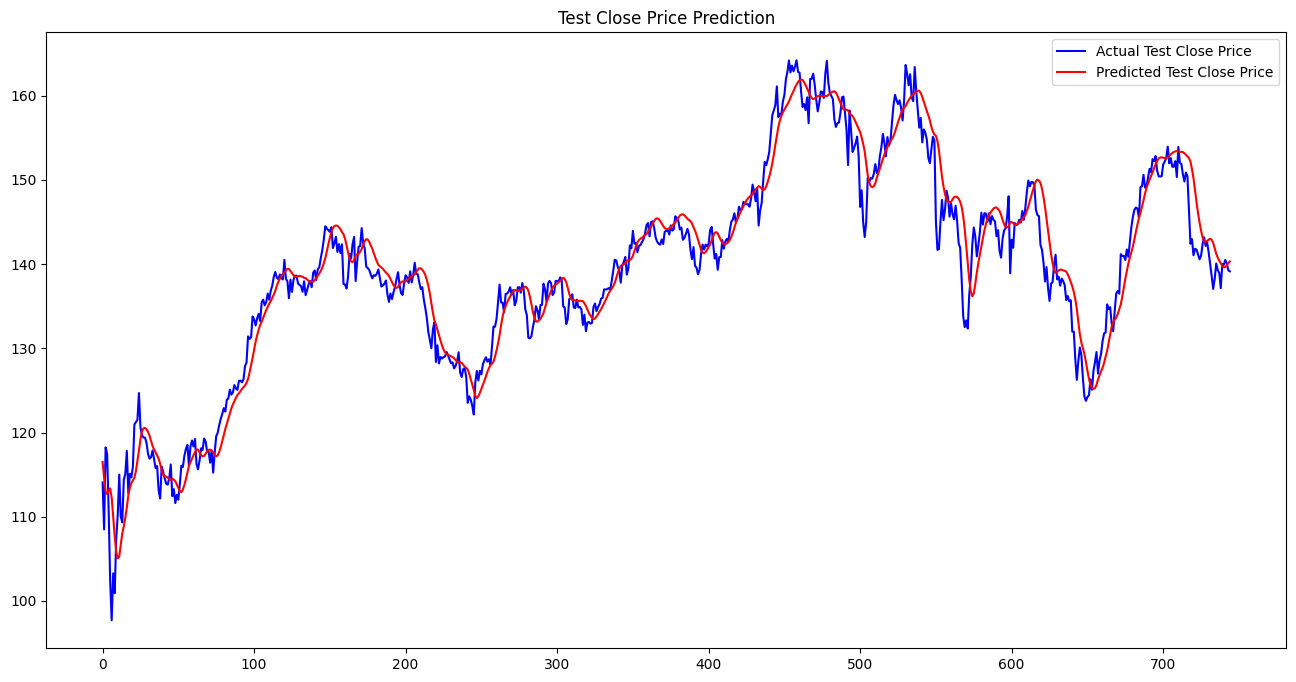

In [65]:
plt.figure(figsize=(16,8))
plt.plot(test_actual, color = 'blue', label = 'Actual Test Close Price')
plt.plot(test_pred, color = 'red', label = 'Predicted Test Close Price')
plt.title('Test Close Price Prediction')
plt.legend()
plt.show()

In [66]:
train_results.append(LSTM_train_RMSE)
test_results.append(LSTM_test_RMSE)
model_names.append("LSTM")

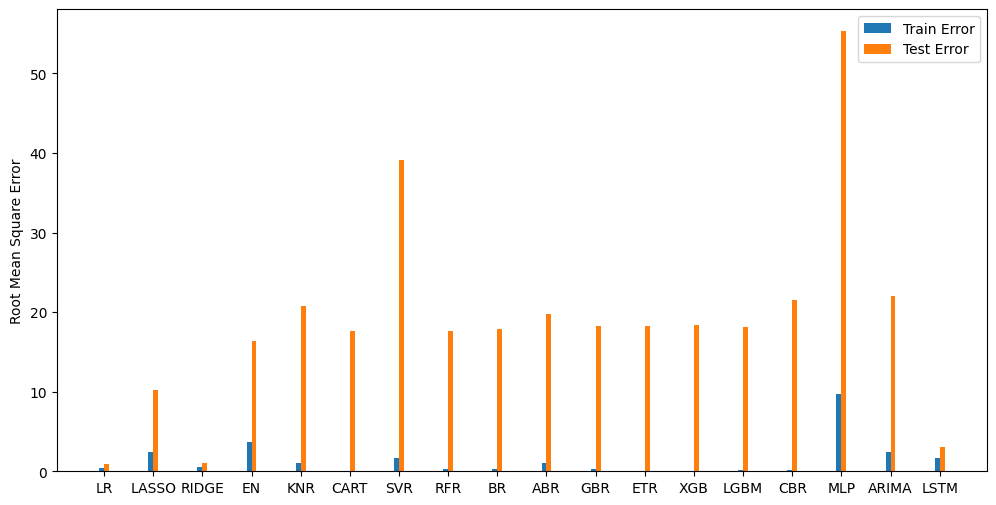

In [67]:
plot_models_RMSE()

#### From the graph above, it can be inferred that LSTM far outperform MLP and ARIMA.